In [360]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [361]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *
from copy import deepcopy

In [362]:
# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
model_new = deepcopy(model)

In [363]:
from estimation import *

In [364]:
est_par = ['gamma', 'sigma', 'N', 'cost1', 'cost2', 'welfare'] # Parameters to estimate
theta0 = [0.9, 0.1, 10, 100, 300, 100] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0,45), (0.0,500,0), (0.0,500,0), (0.0,114/675)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds)


c:\Users\marti\OneDrive - University of Copenhagen\Økonomi\8. semester\Dynamic Prog\old_version\estimation.py:34: OptimizeWarning: Initial guess is not within the specified bounds
  res = minimize(obj_fun,theta0, method='nelder-mead', bounds = bounds)


In [365]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.2345
Parameters:              0.079, 1.204, 8.000, 52.841, 335.016, 0.169, 0.087
Number of iterations:    896


In [366]:
print(model.par.type_shares2)

0.912885113335932


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


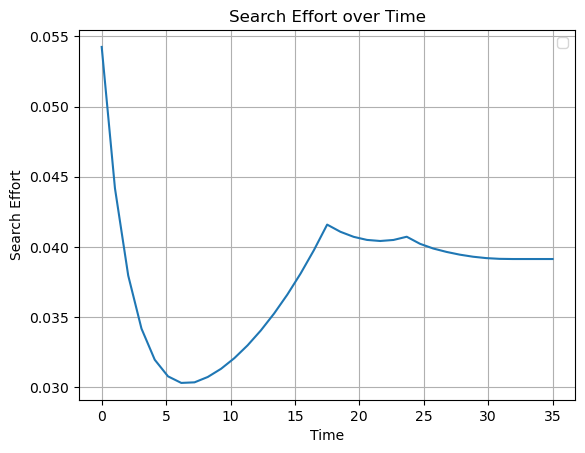

In [367]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [368]:
model.par.b1 = 342.0/675.0
model.par.b2 = 171.0/675.0

model.allocate()
s_forecast = model.solve()



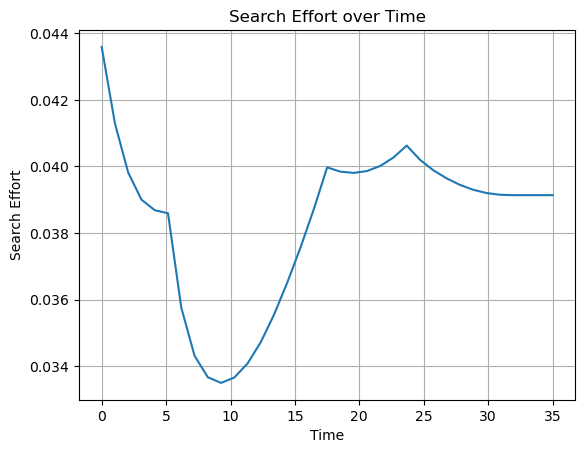

In [369]:
# Now plotting s_forecast
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, s_forecast, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [370]:
true_data = model.data.moments_after
print(np.shape(true_data))
print(np.shape(s_forecast))
# Get the mean square errors
mse_eta1 = np.mean((true_data - s_forecast)**2)
print(mse_eta1)

(35, 1)
(35,)
7.075782583672222e-05


# No reference dependence

In [389]:

model_new.par.eta = 0.0
model_new.par.types = 3
model_new.allocate()

est_par = ['gamma', 'cost1', 'cost2', 'welfare'] # Parameters to estimate
theta0 = [0.9, 100, 200, 0.1] # Initial guesses
bounds = [(0, 50.0), (0.0, 500), (0,500), (0.0,114/675)] # Bounds for the parameters

est = method_simulated_moments(model_new, est_par,theta0,bounds)

In [390]:
print(f'Objective:               {est.fun:.4f}')
print(f'Parameters:              {", ".join([f"{x:.3f}" for x in est.x])}')
print(f'Number of iterations:    {est.nit}')


Objective:               0.2921
Parameters:              0.082, 236.823, 500.000, 0.075, 0.750
Number of iterations:    442


In [391]:
print(model_new.par.types)
print(model_new.par.type_shares1)
print(model_new.par.type_shares2)
print(model_new.par.type_shares3)
print(model_new.par.type_shares1+model_new.par.type_shares2+model_new.par.type_shares3) 

2
0.7500157353329097
0.24998426466709034
0.0
1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


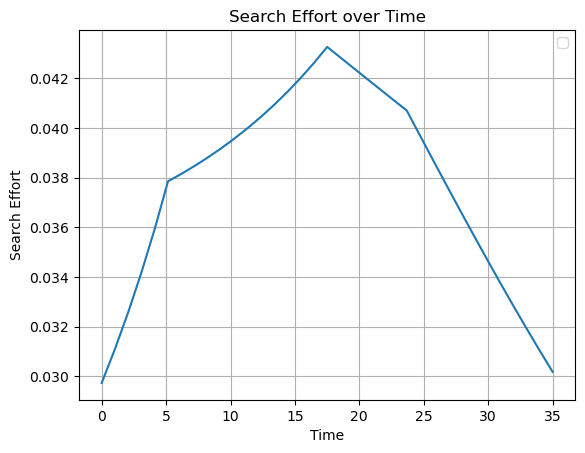

In [392]:
sim_new = sim_search_effort(model_new.par)
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


In [375]:
model_new.par.b1 = 342.0/675.0
model_new.par.b2 = 171.0/675.0

model_new.allocate()
s_forecast_new = model_new.solve()



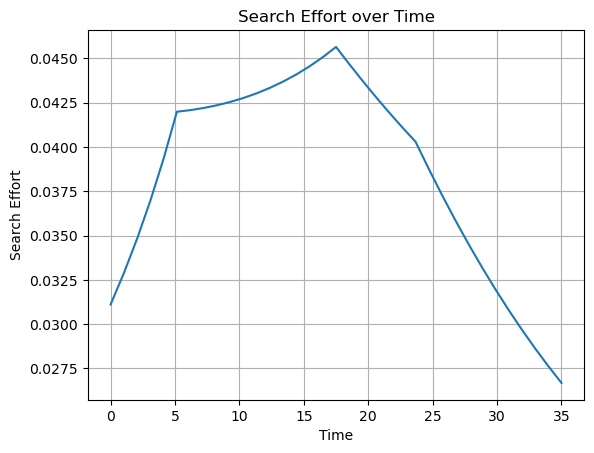

In [376]:
# Now plotting s_forecast
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [377]:
true_data = model_new.data.moments_after
print(np.shape(true_data))
print(np.shape(s_forecast_new))
# Get the mean square errors
mse_eta0 = np.mean((true_data - s_forecast_new)**2)
print(mse_eta1)
print(mse_eta0)

(35, 1)
(35,)
7.075782583672222e-05
9.688467733299984e-05


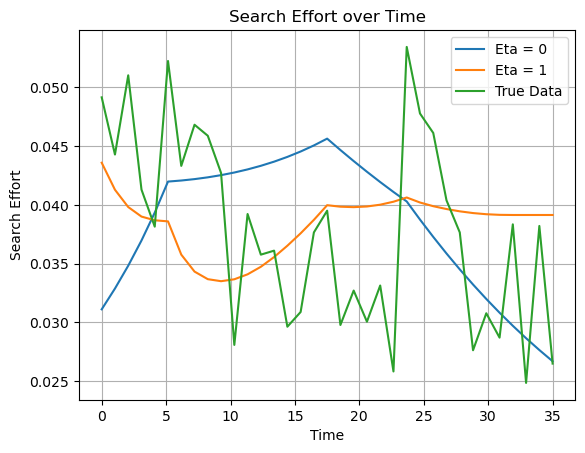

In [378]:
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, label='Eta = 0')
plt.plot(time, s_forecast, label='Eta = 1')
plt.plot(time, true_data, label='True Data')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

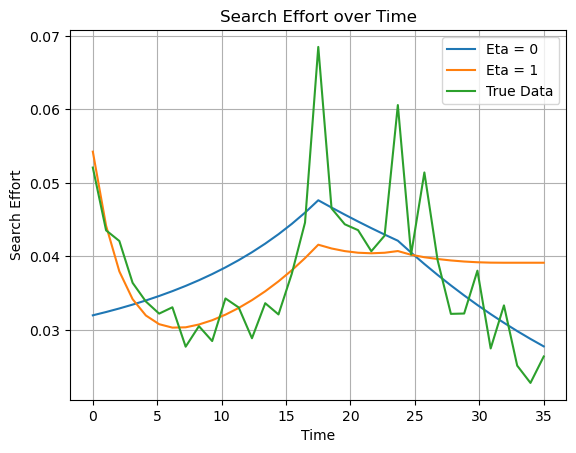

In [379]:
before = model_new.data.moments_before

time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, label='Eta = 0')
plt.plot(time, sim, label='Eta = 1') 
plt.plot(time, before, label='True Data')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()